<a href="https://colab.research.google.com/github/antoinemarchal/fBms/blob/master/fBms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook fBms

###About this *notebook*

####Notebook Authors:
Antoine Marchal


## Installing fBms
[fBms](https://github.com/antoinemarchal/fBms) is a code for 

In [1]:
!pip install fBms
!pip install marchalib

     |████████████████████████████████| 1.6MB 8.0MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 


## Getting started with fBms

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import marchalib as ml
from fBms import fBmnd, Pkgen, Pkgen_break

In [0]:
#shape of you cube or map
shape = (512,512)

#input parameters fBmnd - n is the spectral index, 
#k0 and k1 is spatial frequency range
n=2.7 
k0=0.008; k1=0.4

#Use Pkgen() to simulate a single power law
field = fBmnd(shape, Pkgen(n,k0,k1), seed=31, unit_length=1)

#n1 and n2 are spectral indices and kcrit is the frequency of the break
n1=2.; n2=3.6 
k2=0.0; k3=np.inf
kcrit=0.08 

#Use Pkgen_break() to simulate a single power law with a break
field_break = fBmnd(shape, Pkgen_break(n1, n2, kcrit, k2, k3), seed=32, 
                    unit_length=1)

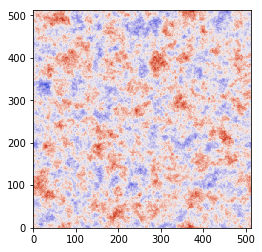

In [102]:
plt.figure()
plt.imshow(field, **ml.imkw_coolwarm)

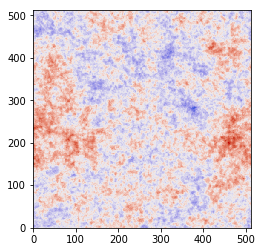

In [103]:
plt.figure()
plt.imshow(field_break, **ml.imkw_coolwarm)

In [0]:
field_zm = field - np.mean(field)
tapper = ml.edges.apodize(0.87, field_zm.shape)
apod_field = field_zm * tapper

sig_conv = 1.
conv_field = ndimage.filters.gaussian_filter(apod_field, [sig_conv,sig_conv])

ks, sps1d_noconv  = ml.powspec(apod_field)
ks, sps1d  = ml.powspec(conv_field)

beam = ml.gauss_beam(sig_conv,conv_field.shape,FWHM=False)

ks, sps1d_beam = ml.powspec(beam)
sps1d_beam = sps1d_beam/sps1d_beam[0]

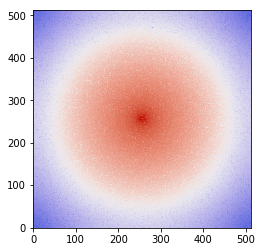

In [106]:
fftfield = np.fft.fft2(conv_field)
shiftfftfield = np.fft.fftshift(fftfield) 
sps2d = np.power(np.abs(shiftfftfield),2) 

plt.figure()
plt.imshow(np.log10(sps2d), **ml.imkw_coolwarm)

Text(0,0.5,'$P(k)$')

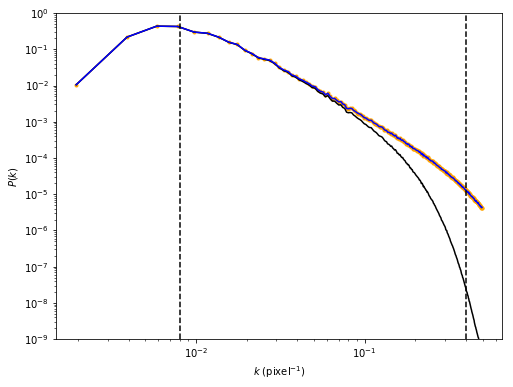

In [83]:
plt.figure(figsize=(8,6))
plt.plot(ks, sps1d_noconv, color='orange', label='Original no conv', marker=".")
plt.plot(ks, sps1d, color='black',label='Original', linewidth=1.5)
plt.plot(ks, sps1d/sps1d_beam, color='blue',label='Corrected', linewidth=1.5)
plt.plot([k0, k0], [1.e-9, 1.], linestyle="--", color="k")
plt.plot([k1, k1], [1.e-9, 1.], linestyle="--", color="k")
plt.ylim([1.e-9, 1.])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$ (pixel$^{-1}$)")
plt.ylabel(r"$P(k)$")